In [1]:
import pandas as pd
from io import StringIO

csv_data = \
''' A,B,C,D
1.0, 2.0, 3.0, 4.0
5.0,6.0,8.0
10.0,11.0, 12,.0 '''

csv_data 

' A,B,C,D\n1.0, 2.0, 3.0, 4.0\n5.0,6.0,8.0\n10.0,11.0, 12,.0 '

In [2]:
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,8.0,NaN
2,10.0,11.0,12.0,0.0


Identifying the null

In [3]:
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,False,True
2,False,False,False,False


In [4]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  8., nan],
       [10., 11., 12.,  0.]])

In [5]:
df.dropna(axis=0) # remove any row with a na entry

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,0.0


In [6]:
df.dropna(axis=1) # remove any colum with a na entry

,A,B,C
0,1.0,2.0,3.0
1,5.0,6.0,8.0
2,10.0,11.0,12.0


Handling categorical code

In [7]:
df = pd.DataFrame([
    [ 'green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']
])

df

,0,1,2,3
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [8]:
df.columns = ['color','size', 'price', 'classlabel'] # assigning column name

In [9]:
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [10]:
 size_mapping = {
     'XL' : 3,
     'L' : 2,
     'M' : 1 }
size_mapping

{'XL': 3, 'L': 2, 'M': 1}

In [11]:
df['size'] = df['size'].map(size_mapping) # mapping the values

In [12]:
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


Encoding classlabel

In [13]:
import numpy as np

class_mapping = {label : idx for idx, label in
                 enumerate(np.unique(df['classlabel']))}
class_mapping


{'class1': 0, 'class2': 1}

In [14]:
df['classlabel'] = df['classlabel'].map(class_mapping)

In [15]:
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [88]:
inverse_class_mapping = {idx  : label for label, idx in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inverse_class_mapping)

In [89]:
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [16]:
from sklearn.preprocessing import LabelEncoder

X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()

In [17]:
X[:, 0] = color_le.fit_transform(X[:,0]) # from all rows just first col

In [18]:
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

Data from external source

In [19]:

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)


Naming the columns

In [20]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 
                   'Flavanoids','Nonflavanoid phenols','Proanthocyanins',
                   'Color intensity', 'Hue','OD280/OD315 of diluted wines',
                   'Proline']
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Perfrom actual splitting

In [21]:
from sklearn.model_selection import train_test_split

X = df_wine.iloc[:,1:].values # from second col to last one excluding class label - Y
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [22]:
y = df_wine.iloc[:, 0].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

Actual data splitting

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 0,
                                                    stratify = y)


In [24]:
X_train, X_test, y_train, y_test

(array([[1.362e+01, 4.950e+00, 2.350e+00, ..., 9.100e-01, 2.050e+00,
         5.500e+02],
        [1.376e+01, 1.530e+00, 2.700e+00, ..., 1.250e+00, 3.000e+00,
         1.235e+03],
        [1.373e+01, 1.500e+00, 2.700e+00, ..., 1.190e+00, 2.710e+00,
         1.285e+03],
        ...,
        [1.388e+01, 5.040e+00, 2.230e+00, ..., 5.800e-01, 1.330e+00,
         4.150e+02],
        [1.196e+01, 1.090e+00, 2.300e+00, ..., 9.900e-01, 3.130e+00,
         8.860e+02],
        [1.270e+01, 3.870e+00, 2.400e+00, ..., 1.190e+00, 3.130e+00,
         4.630e+02]]),
 array([[1.377e+01, 1.900e+00, 2.680e+00, 1.710e+01, 1.150e+02, 3.000e+00,
         2.790e+00, 3.900e-01, 1.680e+00, 6.300e+00, 1.130e+00, 2.930e+00,
         1.375e+03],
        [1.217e+01, 1.450e+00, 2.530e+00, 1.900e+01, 1.040e+02, 1.890e+00,
         1.750e+00, 4.500e-01, 1.030e+00, 2.950e+00, 1.450e+00, 2.230e+00,
         3.550e+02],
        [1.439e+01, 1.870e+00, 2.450e+00, 1.460e+01, 9.600e+01, 2.500e+00,
         2.520e+00, 3.000e-0

feature Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [26]:
X_train_norm

array([[0.64619883, 0.83201581, 0.4248366 , ..., 0.45744681, 0.28571429,
        0.19400856],
       [0.6871345 , 0.15612648, 0.65359477, ..., 0.81914894, 0.63369963,
        0.68259629],
       [0.67836257, 0.15019763, 0.65359477, ..., 0.75531915, 0.52747253,
        0.71825963],
       ...,
       [0.72222222, 0.84980237, 0.34640523, ..., 0.10638298, 0.02197802,
        0.09771755],
       [0.16081871, 0.06916996, 0.39215686, ..., 0.54255319, 0.68131868,
        0.43366619],
       [0.37719298, 0.61857708, 0.45751634, ..., 0.75531915, 0.68131868,
        0.13195435]])

In [27]:
pd.DataFrame(X_train_norm)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.646199,0.832016,0.424837,0.462366,0.271605,0.351724,0.097046,0.68,0.189873,0.236234,0.457447,0.285714,0.194009
1,0.687135,0.156126,0.653595,0.435484,0.765432,0.679310,0.506329,0.74,0.294304,0.325044,0.819149,0.633700,0.682596
2,0.678363,0.150198,0.653595,0.596774,0.382716,0.696552,0.613924,0.32,0.620253,0.351687,0.755319,0.527473,0.718260
3,0.614035,0.209486,0.620915,0.408602,0.493827,0.472414,0.462025,0.32,0.354430,0.218472,0.659574,0.586081,0.582739
4,0.347953,0.339921,0.326797,0.381720,0.296296,0.220690,0.067511,1.00,0.164557,0.476021,0.265957,0.113553,0.297432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0.195906,0.077075,0.529412,0.677419,0.098765,0.351724,0.261603,0.54,0.310127,0.040853,0.882979,0.531136,0.251070
120,0.581871,0.626482,0.509804,0.623656,0.395062,0.282759,0.086498,0.60,0.313291,0.493783,0.234043,0.106227,0.336662
121,0.722222,0.849802,0.346405,0.462366,0.123457,0.000000,0.000000,0.54,0.082278,0.280639,0.106383,0.021978,0.097718
122,0.160819,0.069170,0.392157,0.516129,0.382716,0.827586,0.379747,0.00,0.389241,0.130551,0.542553,0.681319,0.433666


In [28]:
pd.DataFrame(X_train_norm).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,0.474722,0.318931,0.447660,0.451700,0.359120,0.463737,0.363737,0.476129,0.386357,0.297478,0.504461,0.494269,0.340102
std,0.241728,0.232006,0.175925,0.179599,0.174232,0.212880,0.215945,0.243346,0.187502,0.210451,0.235825,0.254857,0.233033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.278509,0.173913,0.351307,0.327957,0.222222,0.282759,0.191983,0.280000,0.265032,0.129663,0.329787,0.266484,0.158524
50%,0.483918,0.218379,0.437908,0.435484,0.339506,0.493103,0.385021,0.420000,0.371835,0.267318,0.515957,0.565934,0.282097
75%,0.668129,0.480237,0.576797,0.553763,0.447531,0.639655,0.542722,0.625000,0.491297,0.396092,0.680851,0.695971,0.539943
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)


In [30]:
pd.DataFrame(X_train_std).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02
mean,6.879354e-15,1.969751e-16,3.797869e-15,2.748697e-16,-3.250088e-16,1.651904e-15,1.526557e-16,-1.195280e-15,1.899019e-15,-1.608033e-15,-5.998786e-16,8.720623e-16,-1.405686e-16
std,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00
min,-1.971837e+00,-1.380243e+00,-2.554934e+00,-2.525252e+00,-2.069521e+00,-2.187238e+00,-1.691226e+00,-1.964528e+00,-2.068907e+00,-1.419256e+00,-2.147813e+00,-1.947267e+00,-1.465378e+00
25%,-8.150037e-01,-6.275963e-01,-5.499141e-01,-6.917901e-01,-7.889079e-01,-8.535947e-01,-7.985839e-01,-8.092365e-01,-6.496852e-01,-8.006399e-01,-7.436984e-01,-8.974047e-01,-7.823560e-01
50%,3.819870e-02,-4.351583e-01,-5.565323e-02,-9.065504e-02,-1.130290e-01,1.385058e-01,9.896271e-02,-2.315907e-01,-7.775997e-02,-1.438903e-01,4.894675e-02,2.823374e-01,-2.499217e-01
75%,8.033481e-01,6.980880e-01,7.370293e-01,5.705935e-01,5.094911e-01,8.297234e-01,8.322044e-01,6.142478e-01,5.619490e-01,4.704883e-01,7.510038e-01,7.946413e-01,8.610452e-01
max,2.181832e+00,2.947475e+00,3.152379e+00,3.065304e+00,3.693237e+00,2.529306e+00,2.958360e+00,2.161513e+00,3.286008e+00,3.351712e+00,2.109824e+00,1.992422e+00,2.843268e+00


In [31]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

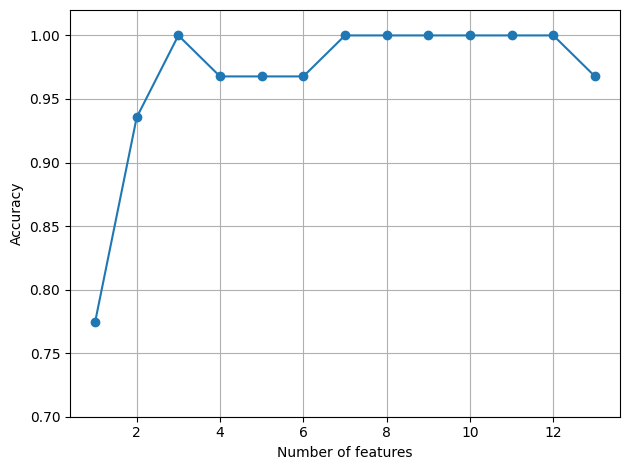

In [34]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show()

Assising features importance with random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
     


RandomForestClassifier(n_estimators=500, random_state=1)

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


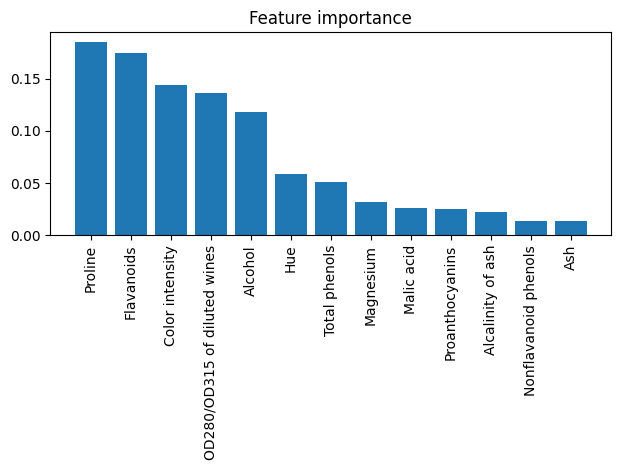

In [36]:

feat_labels = df_wine.columns[1:]
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)
plt.show()

In [37]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

Number of features that meet this threshold criterion: 5


In [38]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
